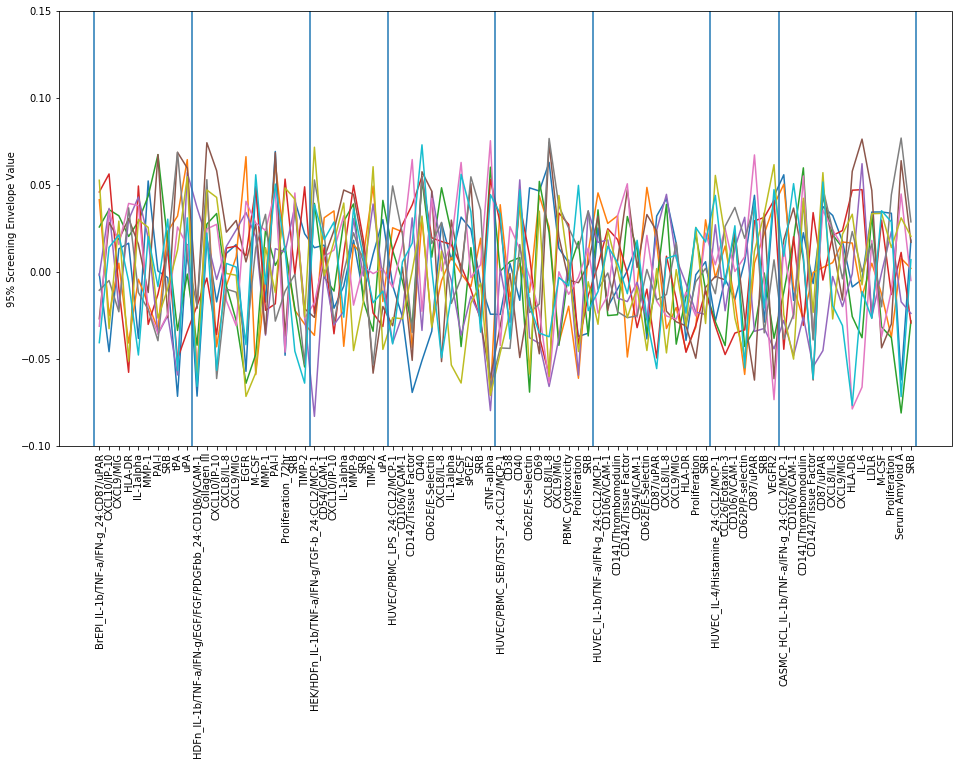

In [42]:
import xml.etree.ElementTree as ET
import pandas as pd
# https://github.com/martinblech/xmltodict
# conda install -c conda-forge xmltodict
import pandas as pd
import xmltodict as x2d
from numpy.random import rand
    
import matplotlib.pyplot as plt
%matplotlib inline


# Read in XML file containg Significance envelope    
xml_data = ""
sig_env_path = '/Users/aberenyi/SigEnvelopeFile.xml'
with open(sig_env_path) as f:
    xml_data = f.read()

# parse xml string as a dictionary
envelope_dict = x2d.parse(xml_data)

# indexes in xml to select profile type/confidence
SCREENING = 0
TRUSTED = 1
PROFILE = 2
_99 = 0
_95 = 1

# Get confidence Screening envelope as a list of dictionaries
ENVELOPE = SCREENING
CONFIDENCE = _95
value_list =  envelope_dict['java']['object']['void'][ENVELOPE]['object'][1]['void'][CONFIDENCE]['object']['void']

# populate values from value_list into a dict, "system:marker':value
screen_envelope_95 = {}
for item in value_list:
    screen_envelope_95[item['string']] = item['float']

    
# print(screen_envelope_95)
# get one value
# print(screen_envelope_95['3T3_IL-1b/TNF-a/IFN-g_24:CD106/VCAM-1'])

#####################################
# now generate random weak profiles #
#####################################

# read SVM published profiles, and get system:marker values from there
data = pd.read_excel('SVMData.xlsx')

# sequence of system-markers in profile is the column names:
system_markers = data.columns.values[1:]

## Generate random Profiles
random_profiles = []
plt.figure(figsize=(16,8))
for rp in range(10):
    random_profile = [float(screen_envelope_95[sm])*(rand()*2-1) for sm in system_markers]
    random_profiles.append(random_profile)

## Plot Random Profiles
x = range(len(random_profile));
for rp in range(10):
    plt.plot(x, random_profiles[rp])


x_labels = []
last_sys = ""
systems = []
v_line_positions = []

for i, sm in enumerate(system_markers):
    s,m = sm.split(':')
    #x_labels.append(m)
    if (last_sys != s):
        x_labels.append("{}:{}".format(s,m))            
        last_sys = s
        systems.append(s)
        v_line_positions.append(i)
    else:
        x_labels.append(m)
            
    
v_line_positions.append(len(system_markers))


plt.xticks(x, x_labels, rotation='vertical');
plt.ylabel('95% Screening Envelope Value');
plt.ylim(-0.1,0.15)

# add vertical lines
for lp in v_line_positions:
    plt.axvline(x=lp-0.5)

# Label Sysytems
for i, sys in enumerate(systems):
    None
    #t = plt.text(v_line_positions[i], 0.1, sys)
    




In [43]:
#print(system_markers)